**The Exploratory Data Analysis (EDA)** is a set of approaches which includes univariate, bivariate and multivariate visualization techniques, dimensionality reduction, cluster analysis. It is important to explore the data and its most important features and to prepare it for more advanced analysis.

In [ ]:
#Uploading the file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


In [ ]:
#Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [ ]:
#We don't need ID information in this EDA
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#Cleaning the data and preprocessing
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,WeekDay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [ ]:
#Exploring the categorical data
print("Unique Values in 'Gender'", list(df.Gender.unique()))
print("Unique Values in 'Scholarship'", list(df.Scholarship.unique()))
print("Unique Values in 'Hypertension'", list(df.Hypertension.unique()))
print("Unique Values in 'Diabetes'", list(df.Diabetes.unique()))
print("Unique Values in 'Alcoholism'", list(df.Alcoholism.unique()))
print("Unique Values in 'Handicap'", list(df.Handicap.unique()))
print("Unique Values in 'SMSReceived'", list(df.SMSReceived.unique()))

Unique Values in 'Gender' ['F', 'M']
Unique Values in 'Scholarship' [0, 1]
Unique Values in 'Hypertension' [1, 0]
Unique Values in 'Diabetes' [0, 1]
Unique Values in 'Alcoholism' [0, 1]
Unique Values in 'Handicap' [0, 1, 2, 3, 4]
Unique Values in 'SMSReceived' [0, 1]


In [ ]:
#Changing the names of some columns
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived'})

In [ ]:
df['WeekDay'] = df['AppointmentDay'].apply(lambda x: x.weekday())
replace_wd = {'WeekDay': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}}
df.replace(replace_wd, inplace=True)

In [ ]:
#Dropping the missing values
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
No-show           0
WeekDay           0
dtype: int64

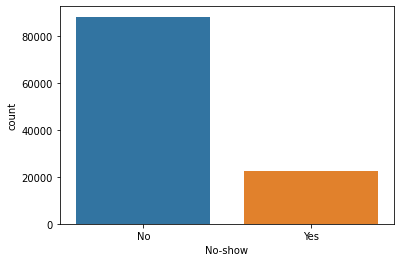

In [ ]:
#plotting the data
ax = sns.countplot(x='No-show', data=df)

#Here we would like to see which of these factors affect the most on people showing up or not to their appointments:

1.    Does the gender play a role int? the day of the week?
2.    Or is it their medical case that affects on them?





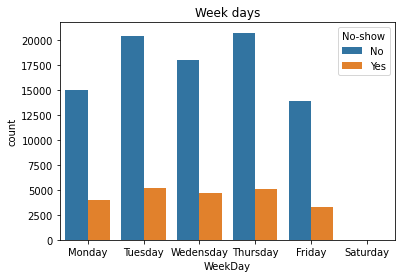

In [ ]:
ax = sns.countplot(x='WeekDay', hue='No-show', data=df)
ax.set_title("Week days")
x_ticks_labels=['Monday','Tuesday', 'Wedensday', 'Thursday', 'Friday', 'Saturday']
ax.set_xticklabels(x_ticks_labels)
plt.show()

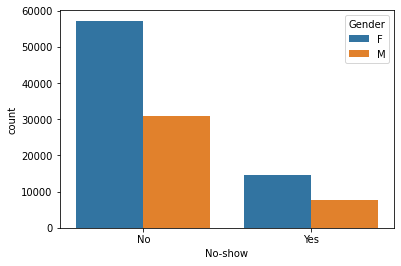

In [ ]:
ax = sns.countplot(x="No-show", hue="Gender", data=df)

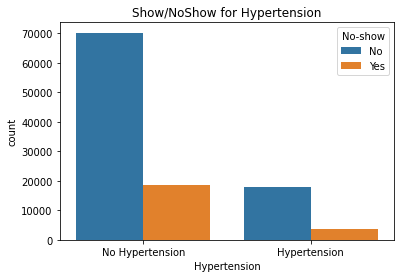

In [ ]:
ax = sns.countplot(x='Hypertension', hue='No-show', data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

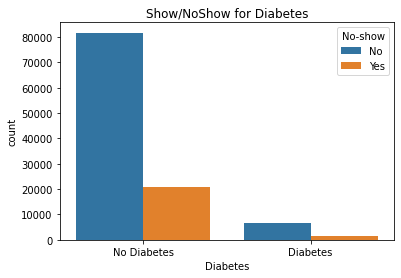

In [ ]:
ax = sns.countplot(x='Diabetes', hue='No-show', data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

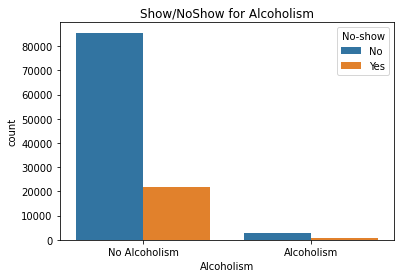

In [ ]:
ax = sns.countplot(x='Alcoholism', hue='No-show', data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

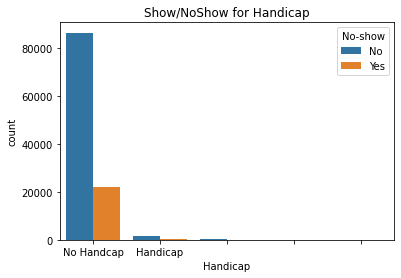

In [ ]:
ax = sns.countplot(x='Handicap', hue='No-show', data=df)
ax.set_title("Show/NoShow for Handicap")
x_ticks_labels=['No Handcap', 'Handicap']
ax.set_xticklabels(x_ticks_labels)
plt.show()

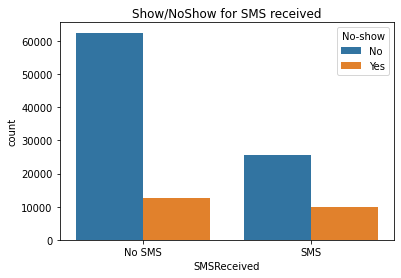

In [ ]:
ax = sns.countplot(x='SMSReceived', hue='No-show', data=df)
ax.set_title("Show/NoShow for SMS received")
x_ticks_labels=['No SMS','SMS']
ax.set_xticklabels(x_ticks_labels)
plt.show()

# What's next?


- Apply unsupervised machine learning techniques
- Analyze which variables have explanatory power to the “No-show up” column.

